In [20]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
digits = load_digits()

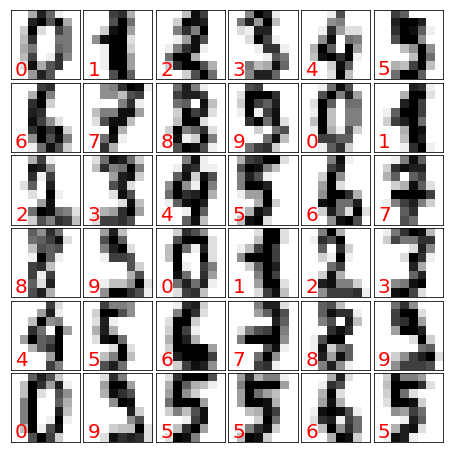

In [21]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left = 0,right = 1,bottom = 0,top =1,hspace = 0.05,wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap = plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]),color='red',fontsize=20)

In [24]:
digits.data.shape
#1797张图，每张图64个像素

(1797, 64)

In [23]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [26]:
scaler = StandardScaler()
scaler.fit(digits.data)
x_scaler = scaler.transform(digits.data)

In [27]:
x_scaler

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [28]:
# ?MLPClassifier

In [39]:
#产生模型,(30,30,30)使用3层隐藏层，每层隐藏层有30个神经元，使用逻辑回归函数最为激活函数，迭代次数为100次
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=1000)
mlp.fit(x_scaler,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
predict = mlp.predict(x_scaler)

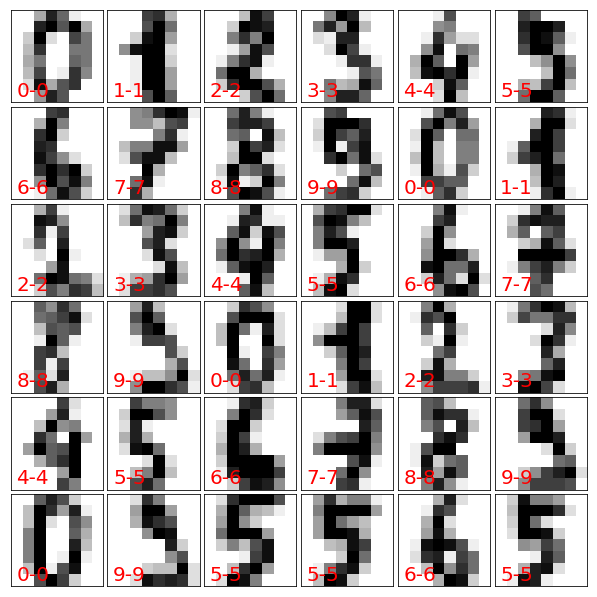

In [41]:
predicted = mlp.predict(x_scaler)
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left =0,right =1,bottom =0,top =1,hspace =0.05,wspace =0.05)
for i in range(36):
    ax = fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str('{}-{}'.format(digits.target[i],predicted[i])),color='red',fontsize = 20)

In [42]:
res = []
for i,j in zip(digits.target,predicted):
    res.append(i==j)

In [44]:
#正确率
sum(res) /len(digits.target)

1.0

In [36]:
sum(res)

1716